# Prerequsites:

## Qdrant Cloud Account https://cloud.qdrant.io/

## Open AI API Key https://platform.openai.com/api-keys

<img src="https://i.imgur.com/sX4332W.jpeg" alt="drawing"/>


![alt text](https://dynamic.bonfireassets.com/thumb/design-image/a5080a6b-4d7f-461e-a636-caf0415f51aa/7329f207-b69c-4f7e-8322-9f628fd81358/900/)

Credit: https://www.bonfire.com/dont-accept-the-defaults-abel-wang/?srsltid=AfmBOoqCtOh9jQzfkDB7b9Z7E42pYi0-RMjWUXUeTkBrnQbWwRJjzz-K

## What will I learn today?


1.   What is a vector database.
2.   Why you can't just put your raw data in a vector database.
3.   What kind of data you can use with Qdrant and some use cases for each modality.
4.   What is chunking, an overview of 5 different chunking methods, and a comparison of semantic and fixed chunking.
5.   What is FastEmbed and what kind of embeddings does it work with.
6.   How to put your data in Qdrant, and a demonstration using Qdrant Cloud




## What's a vector database?


![alt text](https://raw.githubusercontent.com/ramonpzg/mlops-sydney-2023/main/images/qdrant_overview_high_level.png)

**https://cloud.qdrant.io/** 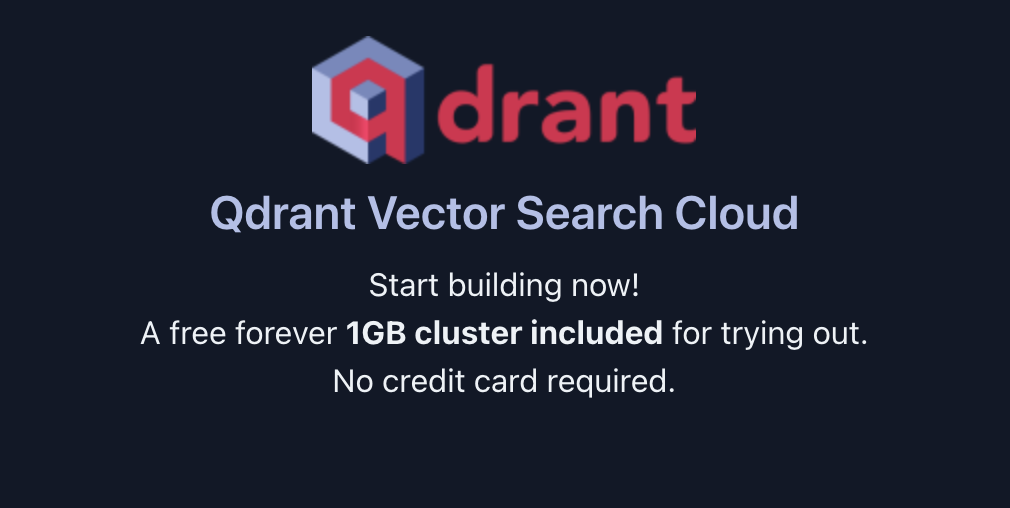

## What kind of data can you use with Qdrant?


![alt text](https://qdrant.tech/articles_data/what-are-embeddings/How-Embeddings-Work.jpg)

### Text

![alt text](https://qdrant.tech/articles_data/what-are-embeddings/How-Do-Embeddings-Work_.jpg)

#### Books, Tweets, Reddit posts

Text can also be something like the lyrics of a song or the transcript of a youtube video.

To get your text into a vdb, you'll first need to turn it into text.

Some examples of applications that use text data in RAG could be a chatbot for customer service, a reccomendation engine for posts on social media, or language tutor to help people learn foreign languages.

### Audio


![alt text](https://d3i71xaburhd42.cloudfront.net/70e8070bb475c0d14e99a6d55fef5cf73a2dc01b/2-Figure1-1.png)

#### You can also use Audio with Qdrant! Audio embeddings can capture more than the lyrics in a song, they can caputre the emotions or the volume of the audio as well! You can build a music reccodementation system or an anomaly detection system for camera audio at a facility with audio embeddings.

https://colab.research.google.com/drive/19AJ6huaw_dM-_h7kADArdXc09K3WNgBw



### Images

![alt text](https://images.prismic.io/encord/5accaa76-6fad-437b-8fbb-94b9544c3789_image7.png?auto=compress%2Cformat&fit=max&w=1812&h=1276&fm=webp)

Credit: https://encord.com/blog/image-embeddings-to-improve-model-performance/

You can also use images Qdrant. Why might you need to embed an image?

Let's say you're beuilding an app to help doctors diagnose patients with skin cancer.

With the power of semantic search, medical professionals could enhance
their diagnostic capabilities and make more accurate decisions regarding skin disease diagnosis.

Another example might be image reccomendation on a photo sharing site.

https://colab.research.google.com/drive/1SUQ5PfWlUB9kP9Em06X9sJ29GE5YFCjB

## What is chunking and a few common chunking methods



![alt text](https://miro.medium.com/v2/resize:fit:1152/1*yIMiJaQexgNqU3BXdR5WKg.png)

How do you eat an elephant? One bit at a time! Chunkinking is the process of breaking your data into smaller bites so that the model can eat it.

### Fixed Size Chunking

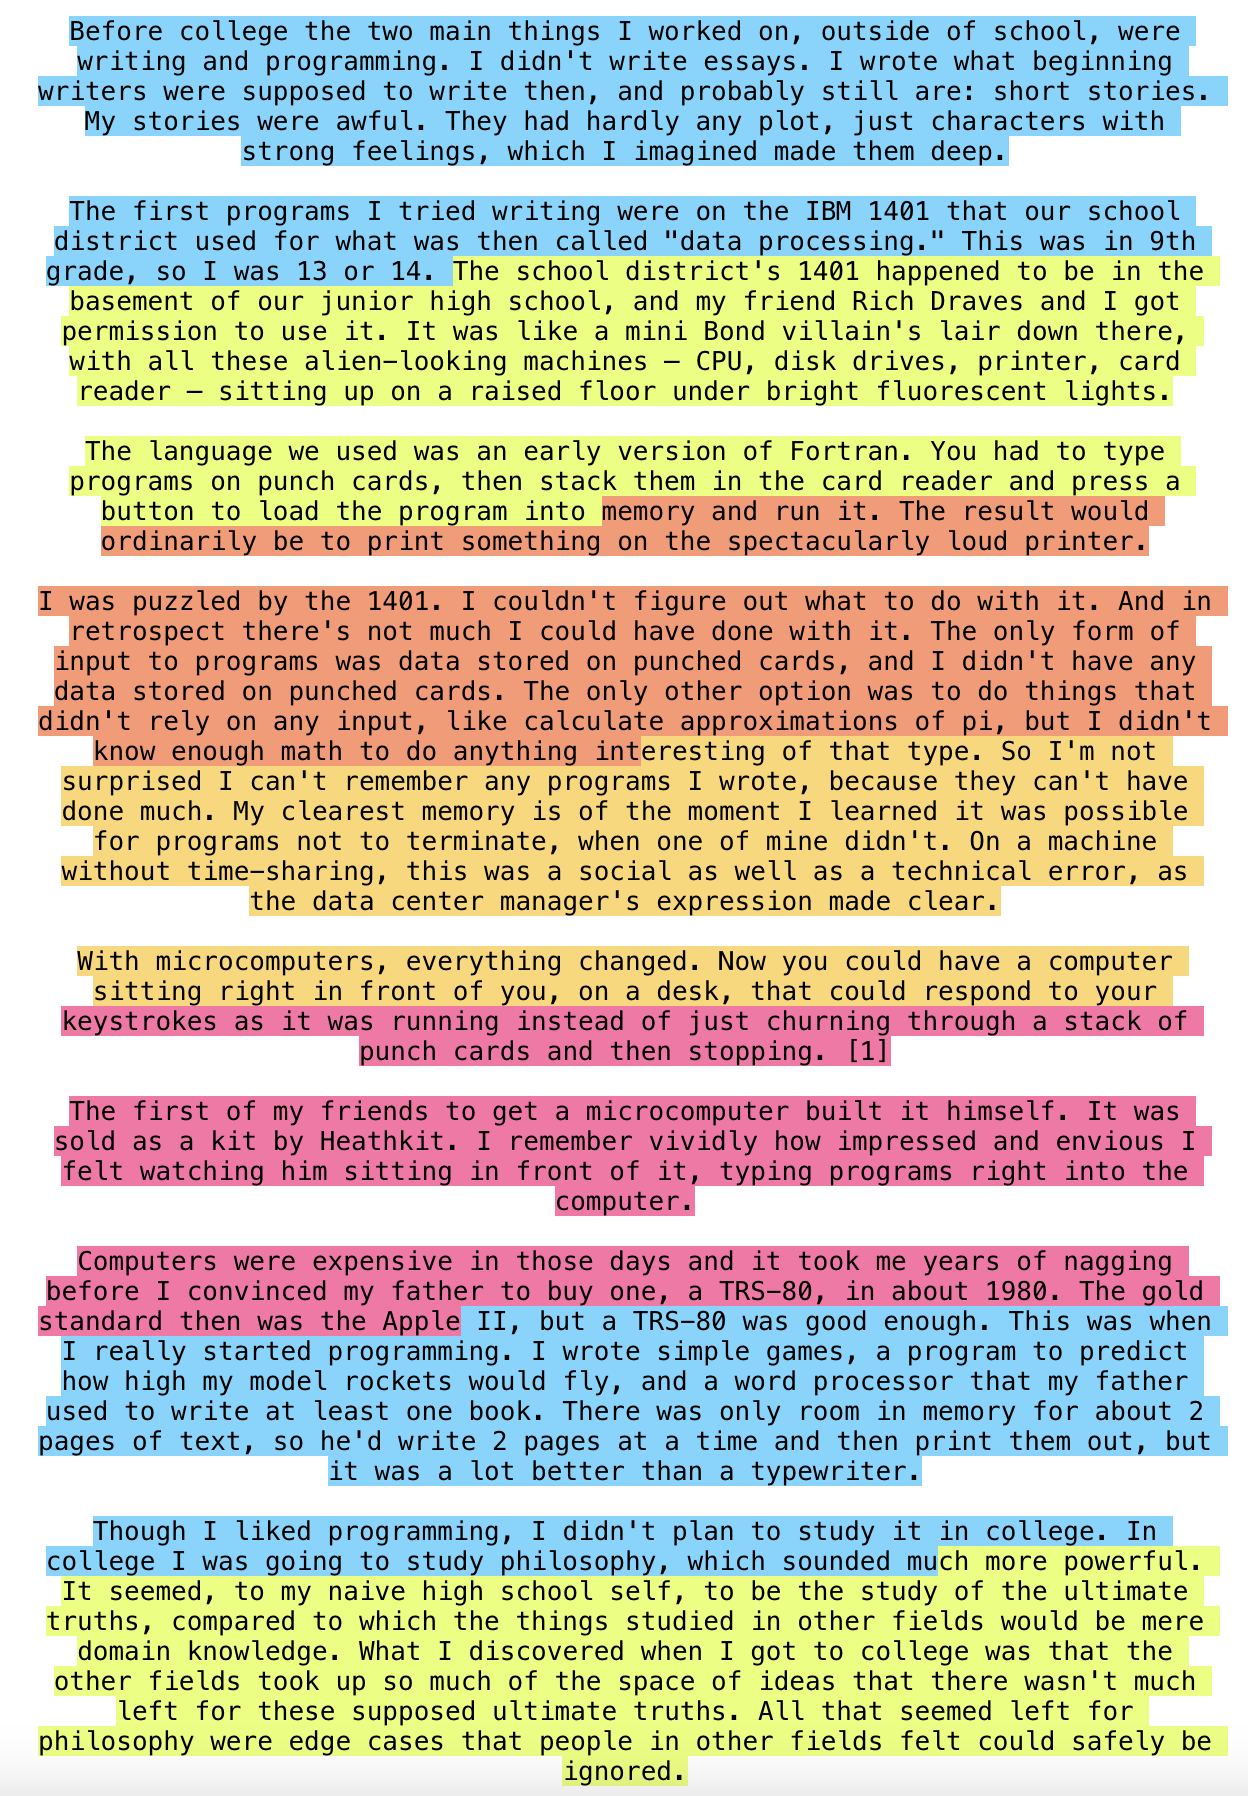

Concept: Your text is split into equal-sized segments, regardless of sentence or paragraph boundaries.

Application: Useful in scenarios where uniformity in chunk size is critical, like certain types of vector indexing or when memory constraints are strict.

Example: If you are building an application based on data where you know exactly how long each chunk will be-like a government form with a clear format.


### Recursive Chunking

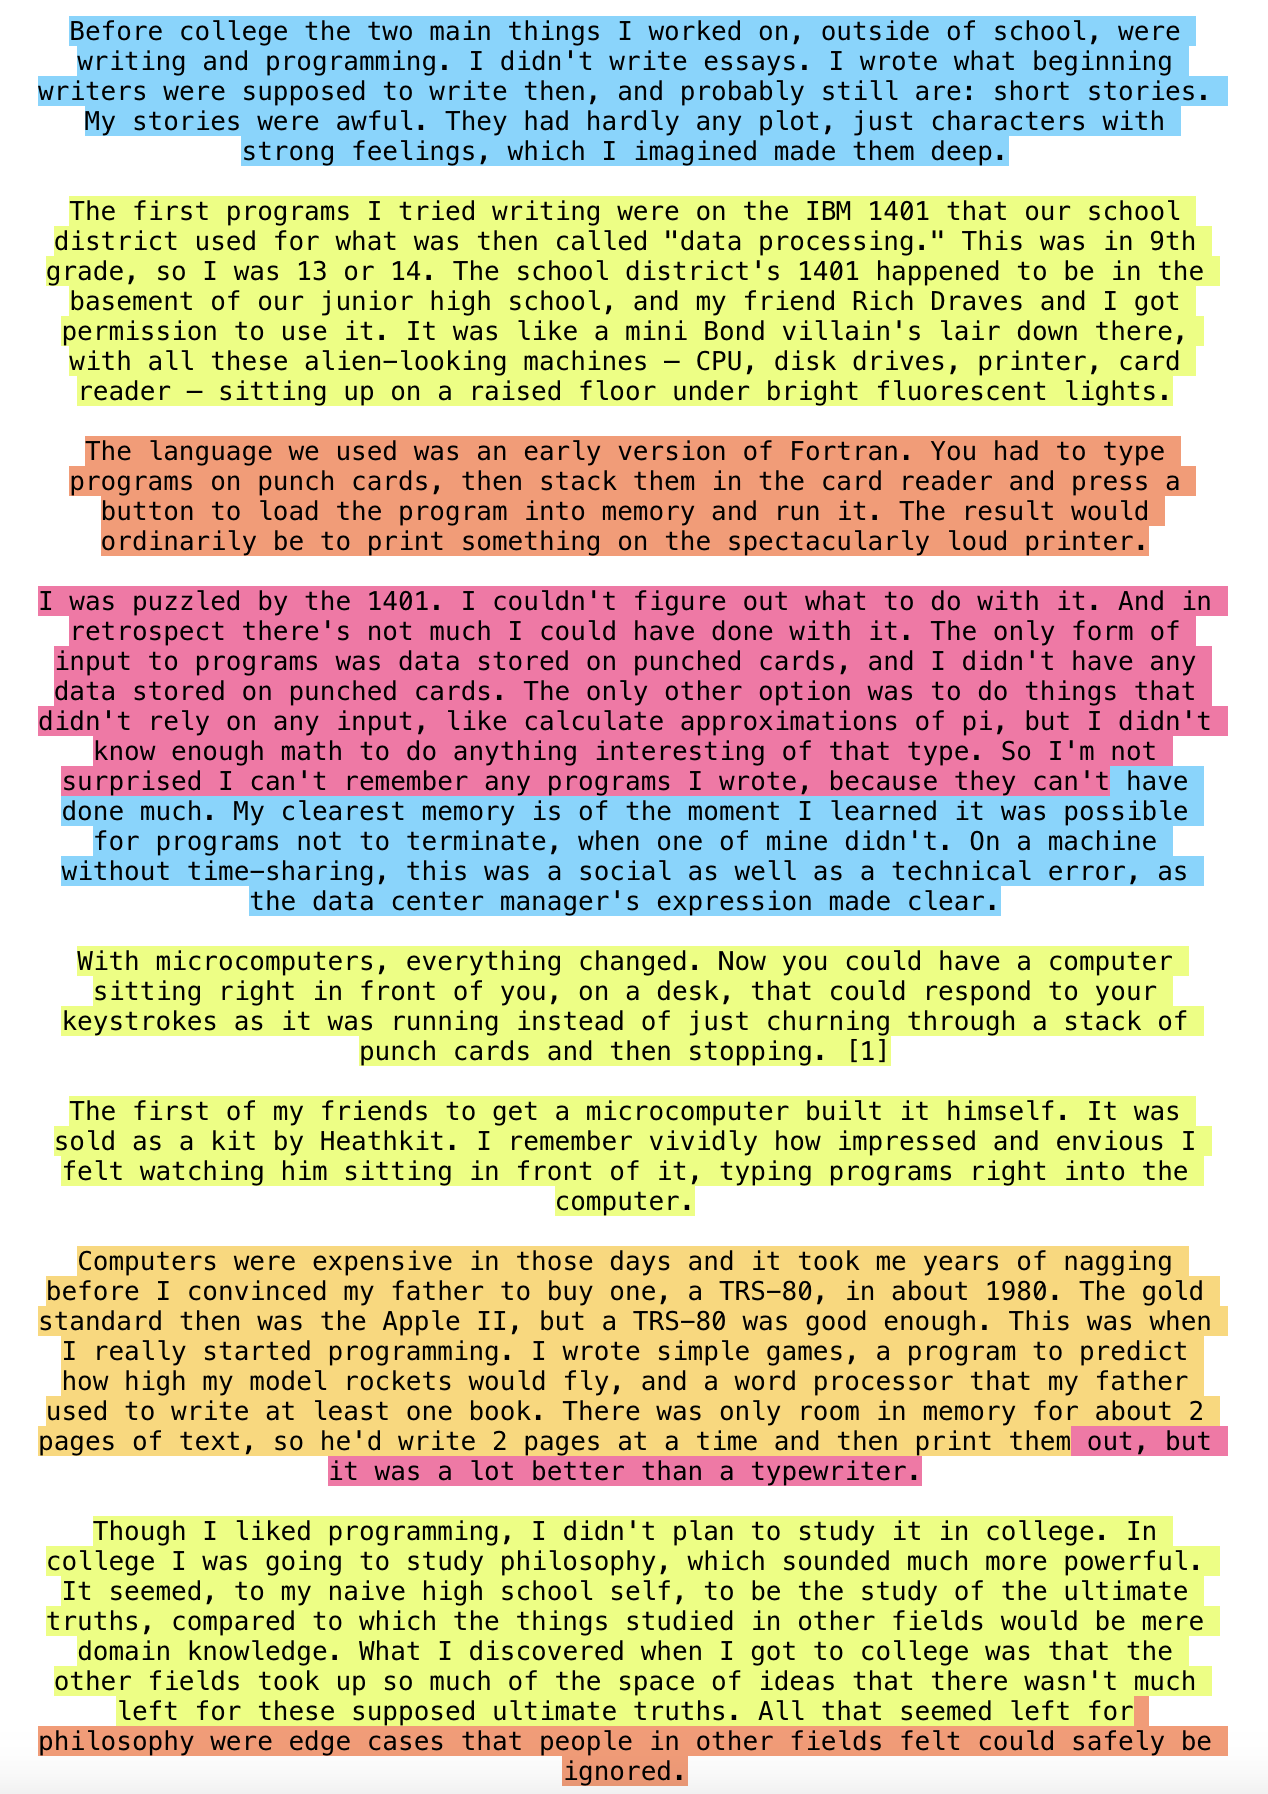

Concept: The document is recursively divided into smaller chunks, starting with large sections like chapters, then splitting those into smaller units like paragraphs, then splitting those paragraphs into sentences.

Application: This method is great for   hierarchical or nested documents, giving your application flexibility with chunking.

Example: A novel that has distinct chapters, or tells a non chronological story.


### Document Based Chunking

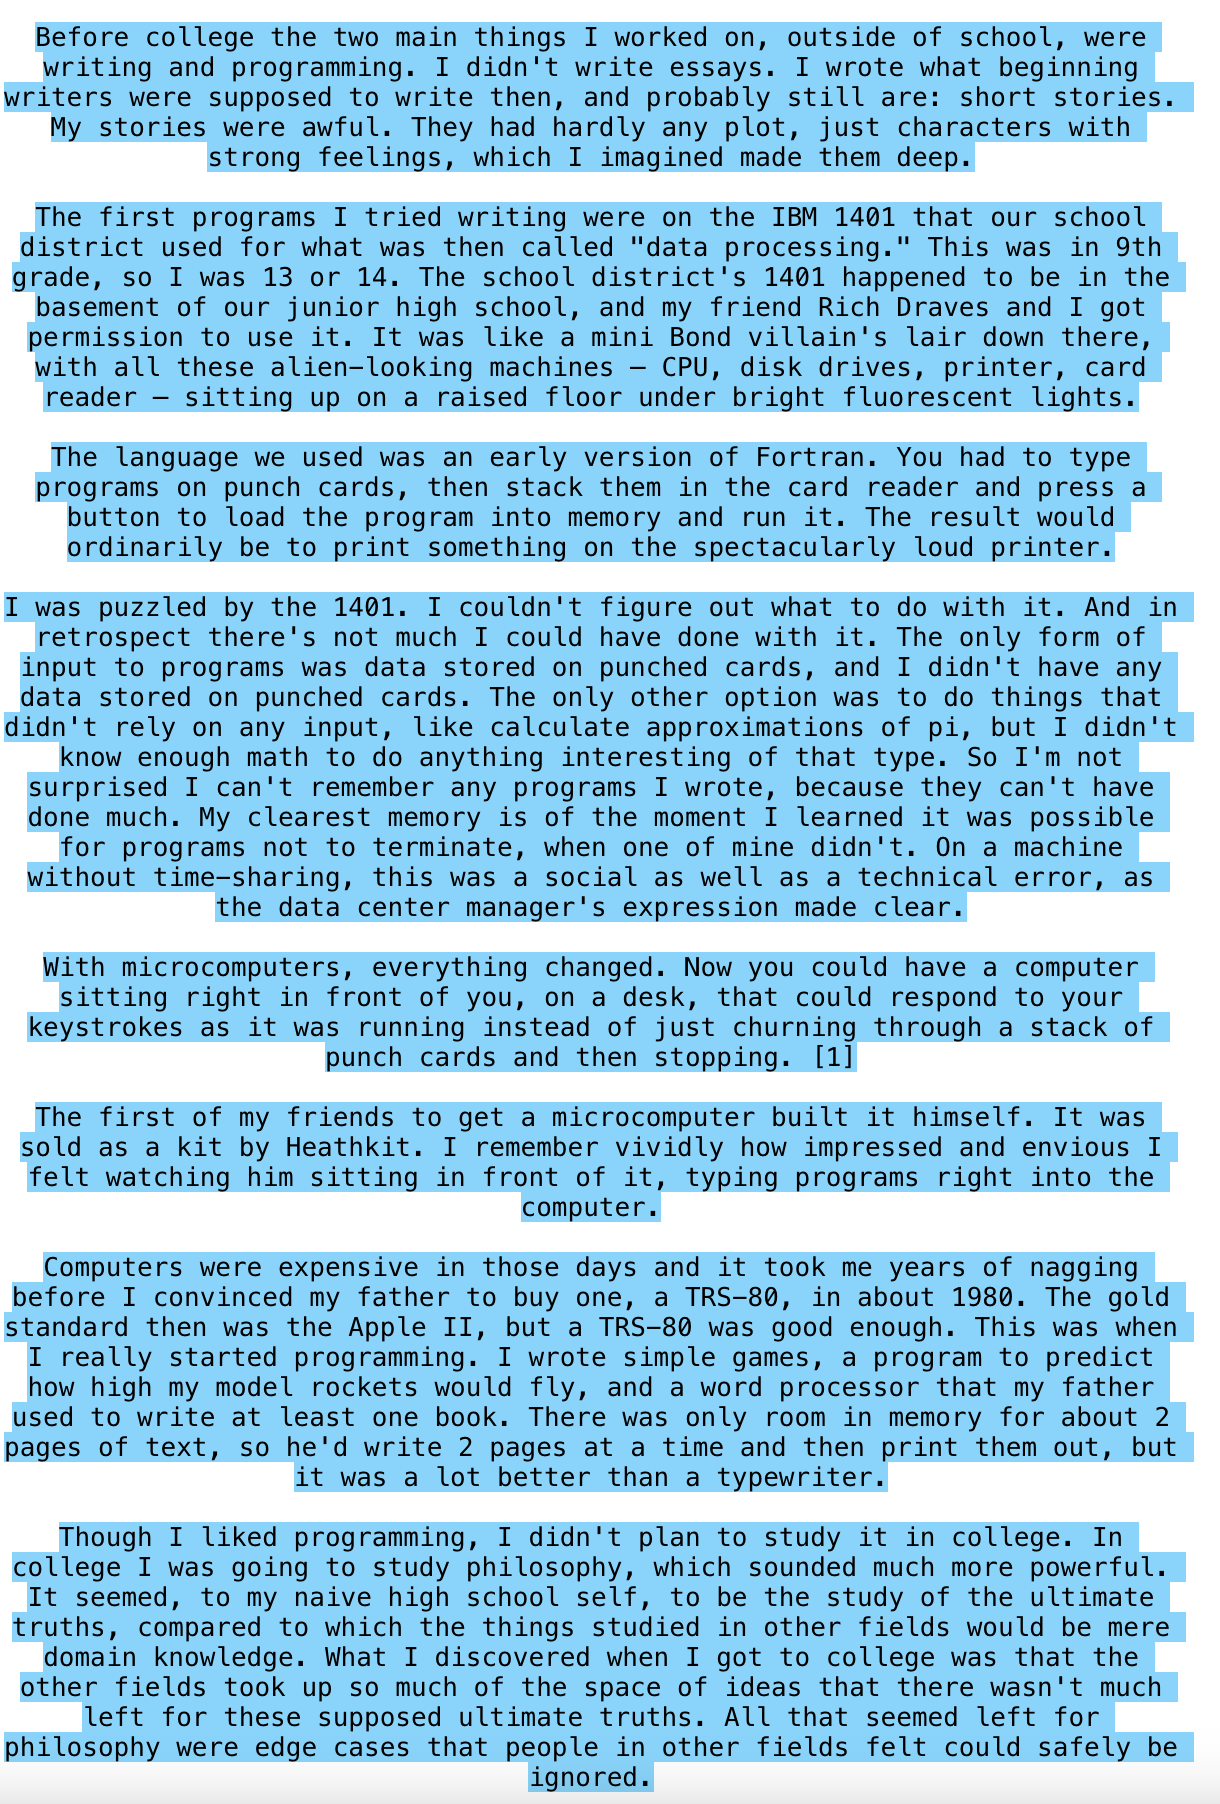

Concept: The entire document is treated as a single chunk or divided at little as possible.

Application: Best for tasks requiring the processing of large texts where breaking up the document too much would lose context, such as in legal, medical or scientific document analysis.

Example: A legal document could be be chunked by charges, each charge being treated as a chunk, maintaining the document's structural integrity.


### Semantic Chunking

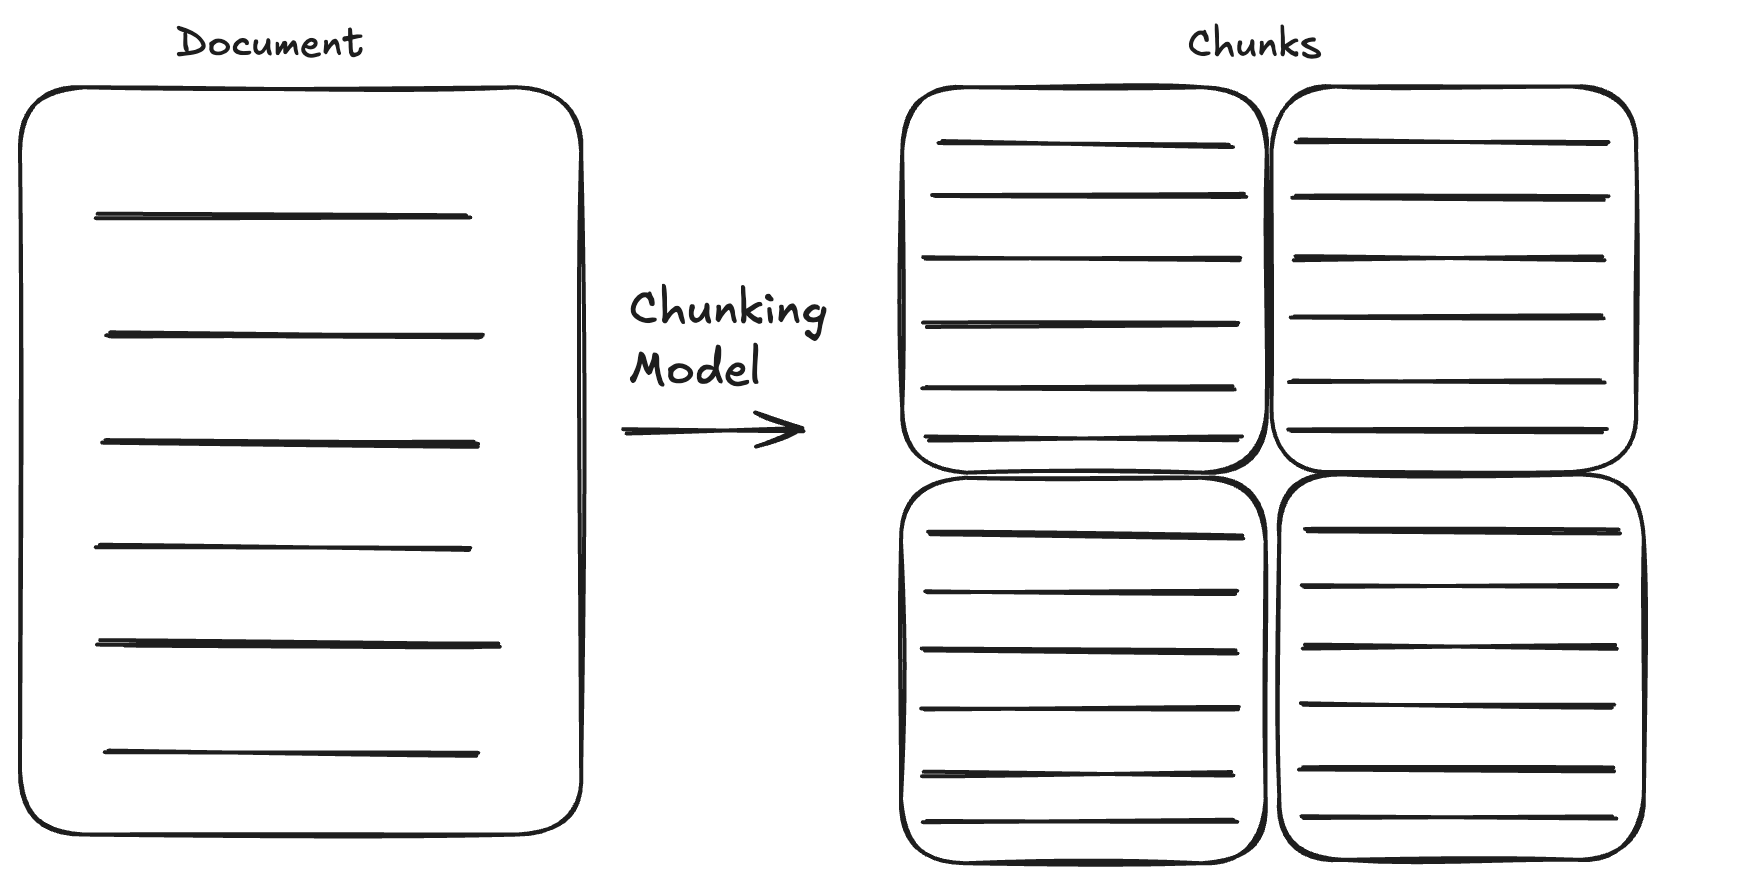

Concept: The document is divided based on  meaning, so that each chunk represents a complete idea or concept.

Application: Works well for tasks where preserving the meaning is important , such as in summarization or when generating embeddings for semantic search.

Example: A stream of thought writing session. A paragraph discussing a single idea might be kept as one chunk, while the next sentence discussing another idea could be a chunk. The next chunk could be a page.



### Agentic Chunking

![alt text](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*aHXJ5wuWuh1faf_BF7i4og.png)

Concept: Document is chunked based on the actions or intentions of an agent.

Application: Useful in narrative analysis, dialogue systems, or any context where understanding the actions and motivations of agents is crucial.

Example: In Harry Potter, each chunk would capture the story of an individual character, making sure that the story and characters are all learned by your application.


## How to find the right Chunking method for your model? Let's compare using a fixed chunk size to semantic chunking!

In [ ]:
# pip install llama_index llama-index-readers-web llama-index-embeddings-openai

In [ ]:
!wget 'https://raw.githubusercontent.com/run-llama/llama_index/main/docs/docs/examples/data/paul_graham/paul_graham_essay.txt' -O 'pg_essay.txt'

--2024-08-29 14:14:32--  https://raw.githubusercontent.com/run-llama/llama_index/main/docs/docs/examples/data/paul_graham/paul_graham_essay.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75042 (73K) [text/plain]
Saving to: ‘pg_essay.txt’

pg_essay.txt        100%[===================>]  73.28K  --.-KB/s    in 0.02s   

2024-08-29 14:14:33 (3.18 MB/s) - ‘pg_essay.txt’ saved [75042/75042]



In [ ]:
from llama_index.core import SimpleDirectoryReader

# load documents
documents = SimpleDirectoryReader(input_files=["pg_essay.txt"]).load_data()

In [ ]:
from llama_index.core.node_parser import (
    SentenceSplitter,
    SemanticSplitterNodeParser,
)
from llama_index.embeddings.openai import OpenAIEmbedding

import os

os.environ["OPENAI_API_KEY"] = "insert OPEN AI API KEY"

In [ ]:
embed_model = OpenAIEmbedding()
splitter = SemanticSplitterNodeParser(
    buffer_size=1, breakpoint_percentile_threshold=95, embed_model=embed_model
)

# also baseline splitter
base_splitter = SentenceSplitter(chunk_size=512)

In [ ]:
nodes = splitter.get_nodes_from_documents(documents)

In [ ]:
print(nodes[1].get_content())

I wrote what beginning writers were supposed to write then, and probably still are: short stories. My stories were awful. They had hardly any plot, just characters with strong feelings, which I imagined made them deep.

The first programs I tried writing were on the IBM 1401 that our school district used for what was then called "data processing." This was in 9th grade, so I was 13 or 14. The school district's 1401 happened to be in the basement of our junior high school, and my friend Rich Draves and I got permission to use it. It was like a mini Bond villain's lair down there, with all these alien-looking machines — CPU, disk drives, printer, card reader — sitting up on a raised floor under bright fluorescent lights.

The language we used was an early version of Fortran. You had to type programs on punch cards, then stack them in the card reader and press a button to load the program into memory and run it. The result would ordinarily be to print something on the spectacularly loud p

In [ ]:
print(nodes[2].get_content())

And in retrospect there's not much I could have done with it. The only form of input to programs was data stored on punched cards, and I didn't have any data stored on punched cards. The only other option was to do things that didn't rely on any input, like calculate approximations of pi, but I didn't know enough math to do anything interesting of that type. So I'm not surprised I can't remember any programs I wrote, because they can't have done much. My clearest memory is of the moment I learned it was possible for programs not to terminate, when one of mine didn't. On a machine without time-sharing, this was a social as well as a technical error, as the data center manager's expression made clear.

With microcomputers, everything changed. Now you could have a computer sitting right in front of you, on a desk, that could respond to your keystrokes as it was running instead of just churning through a stack of punch cards and then stopping. [1]

The first of my friends to get a microcom

In [ ]:
print(nodes[3].get_content())

I knew what I was going to do.

For my undergraduate thesis, I reverse-engineered SHRDLU. My God did I love working on that program. It was a pleasing bit of code, but what made it even more exciting was my belief — hard to imagine now, but not unique in 1985 — that it was already climbing the lower slopes of intelligence.

I had gotten into a program at Cornell that didn't make you choose a major. You could take whatever classes you liked, and choose whatever you liked to put on your degree. I of course chose "Artificial Intelligence." When I got the actual physical diploma, I was dismayed to find that the quotes had been included, which made them read as scare-quotes. At the time this bothered me, but now it seems amusingly accurate, for reasons I was about to discover.

I applied to 3 grad schools: MIT and Yale, which were renowned for AI at the time, and Harvard, which I'd visited because Rich Draves went there, and was also home to Bill Woods, who'd invented the type of parser I u

In [ ]:
base_nodes = base_splitter.get_nodes_from_documents(documents)

In [ ]:
print(base_nodes[1].get_content())

The only form of input to programs was data stored on punched cards, and I didn't have any data stored on punched cards. The only other option was to do things that didn't rely on any input, like calculate approximations of pi, but I didn't know enough math to do anything interesting of that type. So I'm not surprised I can't remember any programs I wrote, because they can't have done much. My clearest memory is of the moment I learned it was possible for programs not to terminate, when one of mine didn't. On a machine without time-sharing, this was a social as well as a technical error, as the data center manager's expression made clear.

With microcomputers, everything changed. Now you could have a computer sitting right in front of you, on a desk, that could respond to your keystrokes as it was running instead of just churning through a stack of punch cards and then stopping. [1]

The first of my friends to get a microcomputer built it himself. It was sold as a kit by Heathkit. I re

In [ ]:
print(base_nodes[2].get_content())

This was when I really started programming. I wrote simple games, a program to predict how high my model rockets would fly, and a word processor that my father used to write at least one book. There was only room in memory for about 2 pages of text, so he'd write 2 pages at a time and then print them out, but it was a lot better than a typewriter.

Though I liked programming, I didn't plan to study it in college. In college I was going to study philosophy, which sounded much more powerful. It seemed, to my naive high school self, to be the study of the ultimate truths, compared to which the things studied in other fields would be mere domain knowledge. What I discovered when I got to college was that the other fields took up so much of the space of ideas that there wasn't much left for these supposed ultimate truths. All that seemed left for philosophy were edge cases that people in other fields felt could safely be ignored.

I couldn't have put this into words when I was 18. All I kne

In [ ]:
print(base_nodes[3].get_content())

I haven't tried rereading The Moon is a Harsh Mistress, so I don't know how well it has aged, but when I read it I was drawn entirely into its world. It seemed only a matter of time before we'd have Mike, and when I saw Winograd using SHRDLU, it seemed like that time would be a few years at most. All you had to do was teach SHRDLU more words.

There weren't any classes in AI at Cornell then, not even graduate classes, so I started trying to teach myself. Which meant learning Lisp, since in those days Lisp was regarded as the language of AI. The commonly used programming languages then were pretty primitive, and programmers' ideas correspondingly so. The default language at Cornell was a Pascal-like language called PL/I, and the situation was similar elsewhere. Learning Lisp expanded my concept of a program so fast that it was years before I started to have a sense of where the new limits were. This was more like it; this was what I had expected college to do. It wasn't happening in a c

https://www.llamaindex.ai/blog/evaluating-the-ideal-chunk-size-for-a-rag-system-using-llamaindex-6207e5d3fec5

## How to use FastEmbed: Qdrant's efficient Python library for embedding generation


![alt text](https://qdrant.tech/articles_data/fastembed/preview/social_preview.jpg)

In the earlier examples I used a variety of methods to embed the data. Qdrant is compatible with all embeddings, but we do offer our own Embedding library that intergrates seamlessly with FastEmbed. FastEmbed supports Dense Text Embeddings, Sparse Text Embeddings, Late Interaction Text Embeddings, and Image Embeddings.

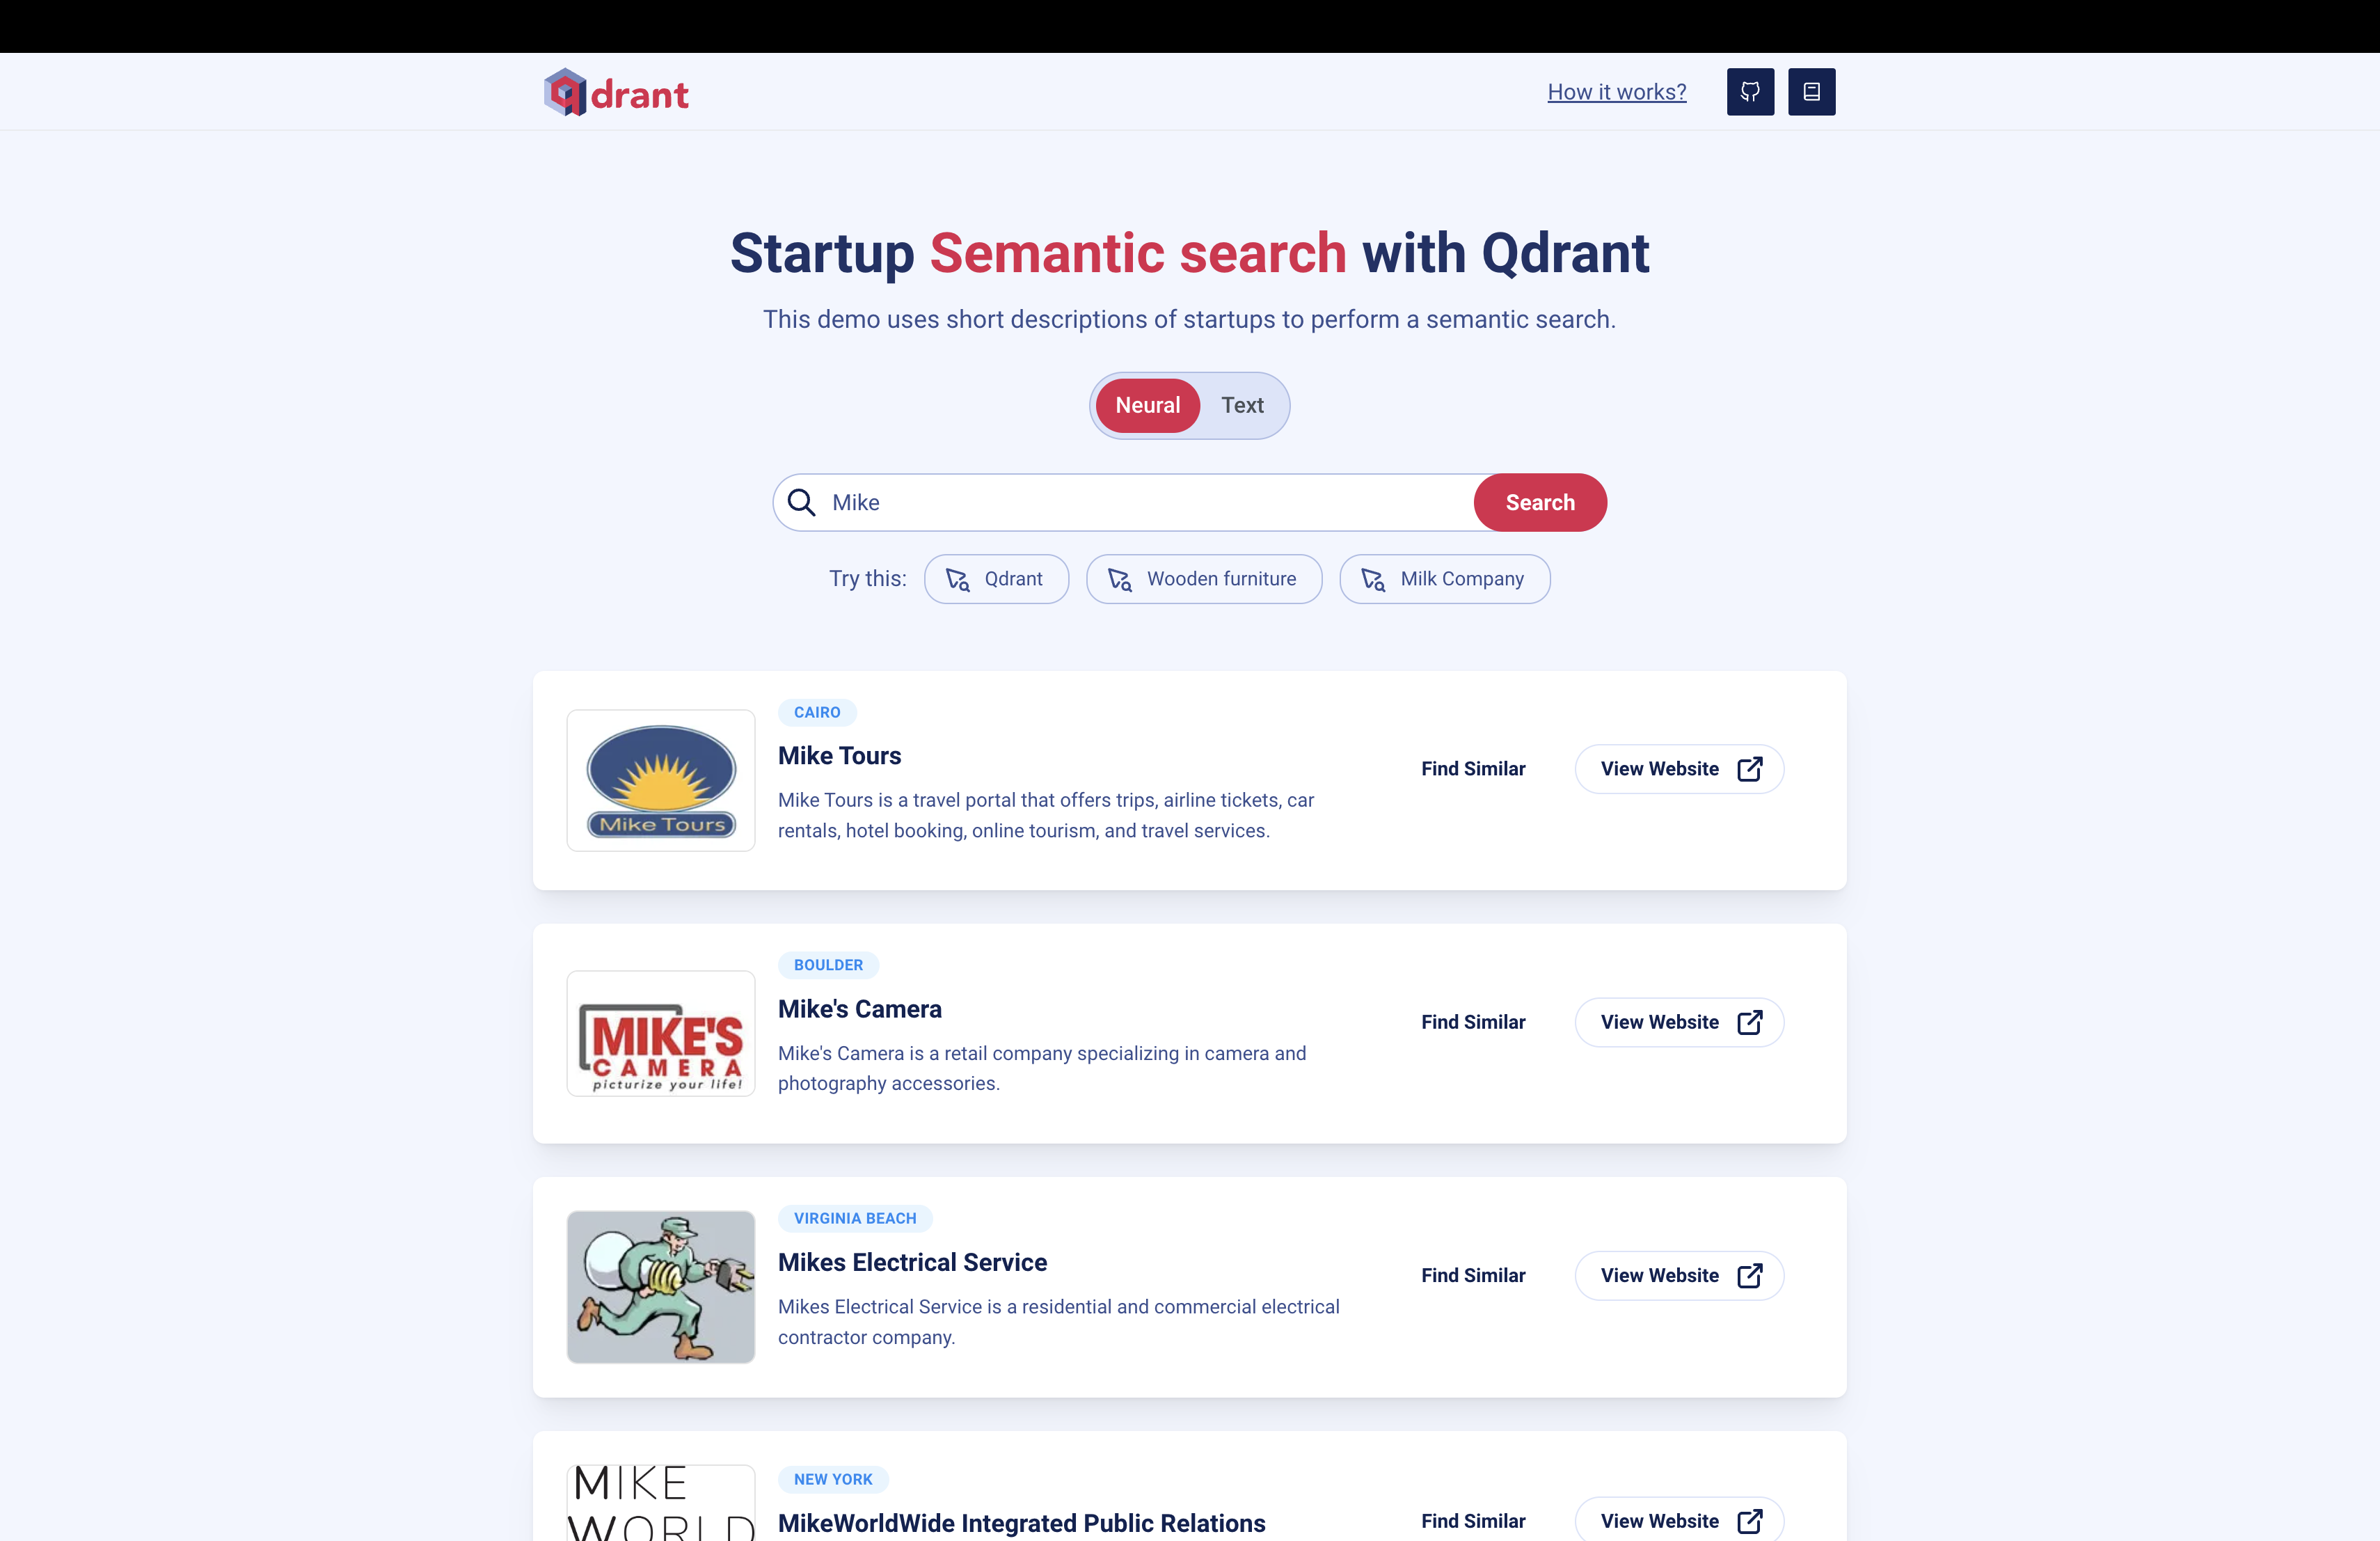

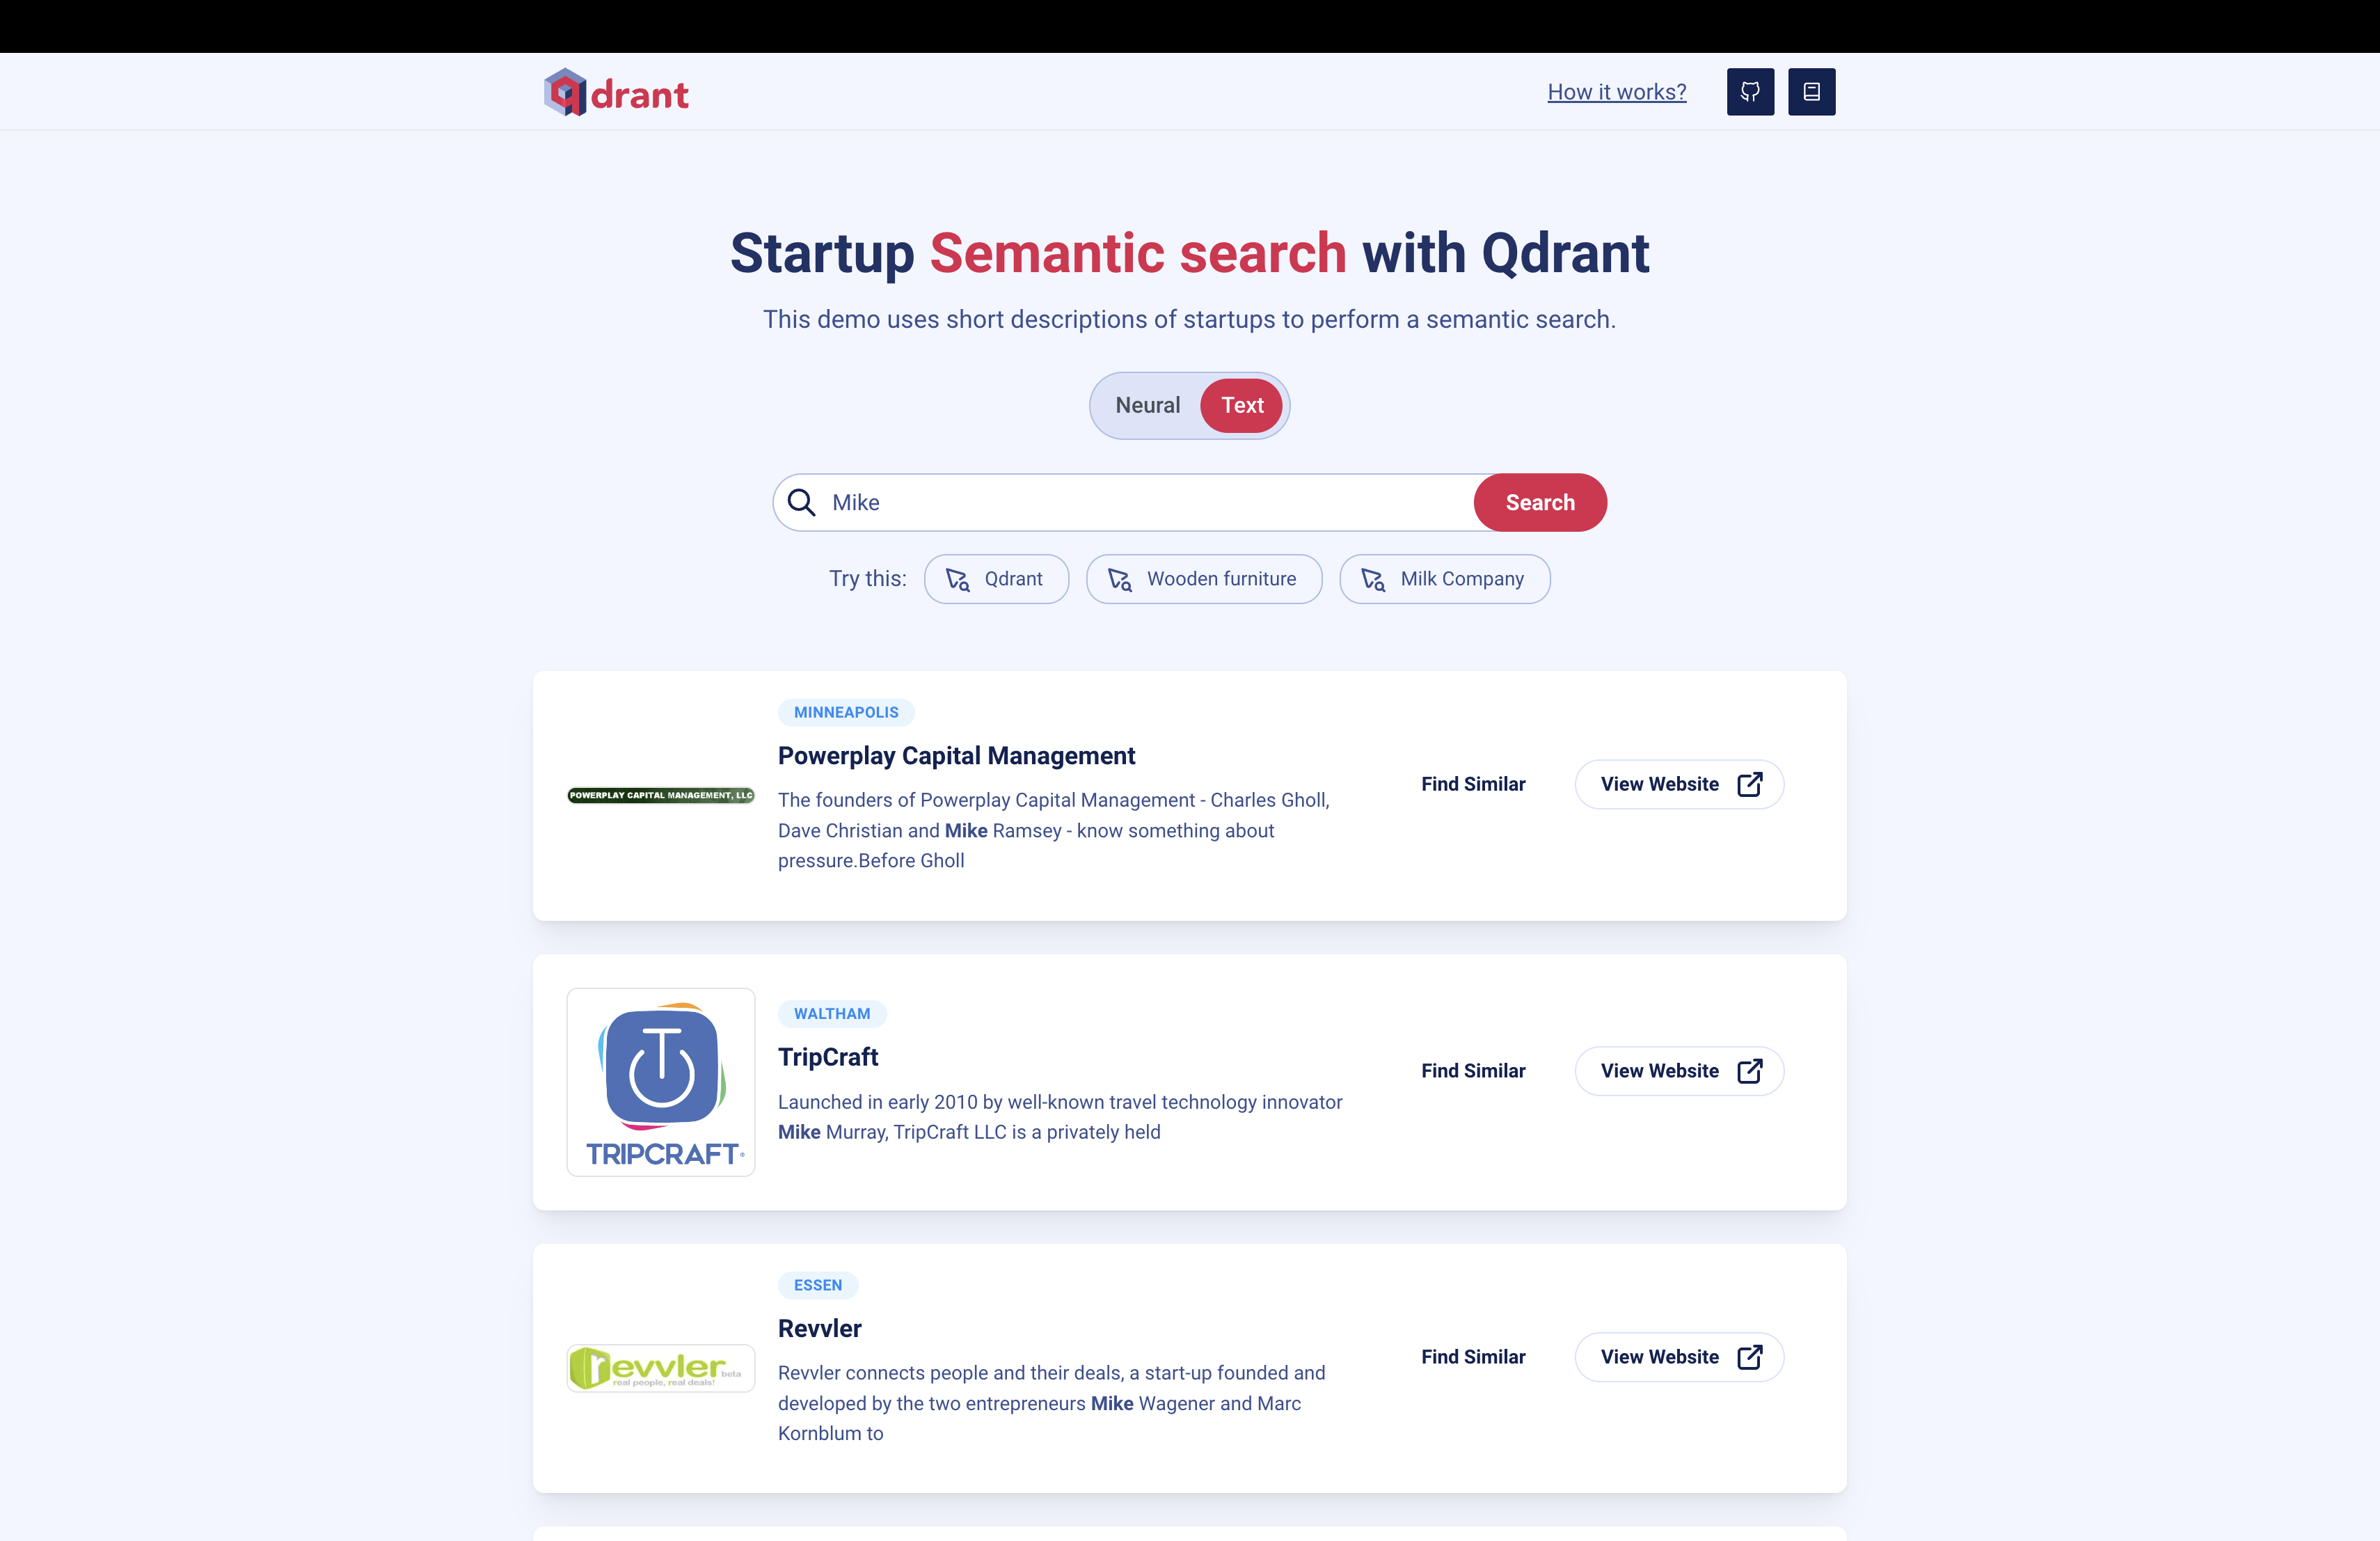

### Dense Text Embeddings

In [ ]:
# pip install qdrant-client[fastembed]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [ ]:
from fastembed import TextEmbedding
from typing import List

# Example list of documents
documents: List[str] = [
    "This is built to be faster and lighter than other embedding libraries e.g. Transformers, Sentence-Transformers, etc.",
    "fastembed is supported by and maintained by Qdrant.",
]

# This will trigger the model download and initialization
embedding_model = TextEmbedding()
print("The model BAAI/bge-small-en-v1.5 is ready to use.")

embeddings_generator = embedding_model.embed(documents)  # reminder this is a generator
embeddings_list = list(embedding_model.embed(documents))
# you can also convert the generator to a list, and that to a numpy array
len(embeddings_list[0])  # Vector of 384 dimensions

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

The model BAAI/bge-small-en-v1.5 is ready to use.


384

In [ ]:
model = TextEmbedding(model_name="BAAI/bge-small-en-v1.5")
embeddings = list(model.embed(documents))

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
index = 0
embeddings[index]

array([-0.11154678,  0.00976557,  0.00524557,  0.01951891, -0.01934949,
        0.0294345 , -0.10519082, -0.00890124,  0.01831442,  0.01486797,
       -0.05642503,  0.02561353, -0.00120164,  0.0063746 ,  0.02633463,
        0.00892209,  0.05313657,  0.03955458, -0.04400248, -0.02929408,
        0.04691843, -0.0251587 ,  0.00778646, -0.05410659, -0.04362102,
        0.012751  , -0.02304645, -0.02250822,  0.01992302, -0.19920594,
        0.01895357, -0.02651562,  0.08252291, -0.02281936, -0.05781297,
       -0.01367695, -0.0357074 ,  0.05386202, -0.10155273,  0.02097267,
        0.00652709,  0.03738068, -0.03508431, -0.00091196,  0.03425013,
       -0.0244589 , -0.00739988, -0.03084341, -0.0360513 , -0.02814267,
        0.01547158, -0.02158506,  0.02544232,  0.02438807, -0.02049713,
       -0.02665791,  0.03727328,  0.08809513,  0.02471923, -0.00851185,
       -0.02016541,  0.05734602, -0.05127534,  0.02370389, -0.02993908,
       -0.02091452, -0.03927831, -0.02315616,  0.00927734,  0.07

### Sparse Text Embeddings

In [ ]:
#!pip install -q fastembed


In [ ]:
from fastembed import SparseTextEmbedding, SparseEmbedding
from typing import List

In [ ]:
SparseTextEmbedding.list_supported_models()

[{'model': 'prithivida/Splade_PP_en_v1',
  'vocab_size': 30522,
  'description': 'Independent Implementation of SPLADE++ Model for English',
  'size_in_GB': 0.532,
  'sources': {'hf': 'Qdrant/SPLADE_PP_en_v1'},
  'model_file': 'model.onnx'},
 {'model': 'prithvida/Splade_PP_en_v1',
  'vocab_size': 30522,
  'description': 'Independent Implementation of SPLADE++ Model for English',
  'size_in_GB': 0.532,
  'sources': {'hf': 'Qdrant/SPLADE_PP_en_v1'},
  'model_file': 'model.onnx'},
 {'model': 'Qdrant/bm42-all-minilm-l6-v2-attentions',
  'vocab_size': 30522,
  'description': 'Light sparse embedding model, which assigns an importance score to each token in the text',
  'size_in_GB': 0.09,
  'sources': {'hf': 'Qdrant/all_miniLM_L6_v2_with_attentions'},
  'model_file': 'model.onnx',
  'additional_files': ['stopwords.txt'],
  'requires_idf': True},
 {'model': 'Qdrant/bm25',
  'description': 'BM25 as sparse embeddings meant to be used with Qdrant',
  'size_in_GB': 0.01,
  'sources': {'hf': 'Qdra

In [ ]:
model_name = "Qdrant/bm25"
# This triggers the model download
model = SparseTextEmbedding(model_name=model_name)

Fetching 29 files:   0%|          | 0/29 [00:00<?, ?it/s]

chinese.txt:   0%|          | 0.00/5.56k [00:00<?, ?B/s]

azerbaijani.txt:   0%|          | 0.00/967 [00:00<?, ?B/s]

arabic.txt:   0%|          | 0.00/6.35k [00:00<?, ?B/s]

basque.txt:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

catalan.txt:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

bengali.txt:   0%|          | 0.00/5.44k [00:00<?, ?B/s]

danish.txt:   0%|          | 0.00/424 [00:00<?, ?B/s]

dutch.txt:   0%|          | 0.00/453 [00:00<?, ?B/s]

finnish.txt:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

french.txt:   0%|          | 0.00/813 [00:00<?, ?B/s]

english.txt:   0%|          | 0.00/936 [00:00<?, ?B/s]

german.txt:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

greek.txt:   0%|          | 0.00/2.17k [00:00<?, ?B/s]

hinglish.txt:   0%|          | 0.00/5.96k [00:00<?, ?B/s]

hebrew.txt:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

hungarian.txt:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

nepali.txt:   0%|          | 0.00/3.61k [00:00<?, ?B/s]

kazakh.txt:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

norwegian.txt:   0%|          | 0.00/851 [00:00<?, ?B/s]

italian.txt:   0%|          | 0.00/1.65k [00:00<?, ?B/s]

indonesian.txt:   0%|          | 0.00/6.45k [00:00<?, ?B/s]

portuguese.txt:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

romanian.txt:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

russian.txt:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

slovene.txt:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

spanish.txt:   0%|          | 0.00/2.18k [00:00<?, ?B/s]

swedish.txt:   0%|          | 0.00/559 [00:00<?, ?B/s]

tajik.txt:   0%|          | 0.00/1.82k [00:00<?, ?B/s]

turkish.txt:   0%|          | 0.00/260 [00:00<?, ?B/s]

In [ ]:
documents: List[str] = [
    "Chandrayaan-3 is India's third lunar mission",
    "It aimed to land a rover on the Moon's surface - joining the US, China and Russia",
    "The mission is a follow-up to Chandrayaan-2, which had partial success",
    "Chandrayaan-3 will be launched by the Indian Space Research Organisation (ISRO)",
    "The estimated cost of the mission is around $35 million",
    "It will carry instruments to study the lunar surface and atmosphere",
    "Chandrayaan-3 landed on the Moon's surface on 23rd August 2023",
    "It consists of a lander named Vikram and a rover named Pragyan similar to Chandrayaan-2. Its propulsion module would act like an orbiter.",
    "The propulsion module carries the lander and rover configuration until the spacecraft is in a 100-kilometre (62 mi) lunar orbit",
    "The mission used GSLV Mk III rocket for its launch",
    "Chandrayaan-3 was launched from the Satish Dhawan Space Centre in Sriharikota",
    "Chandrayaan-3 was launched earlier in the year 2023",
]
sparse_embeddings_list: List[SparseEmbedding] = list(
    model.embed(documents, batch_size=6)
)  # batch_size is optional, notice the generator

In [ ]:
index = 0
sparse_embeddings_list[index]

SparseEmbedding(values=array([1.66528681, 1.66528681, 1.66528681, 1.66528681, 1.66528681,
       1.66528681]), indices=array([1558122631,  746093202,  691409538, 1391639301, 2042792262,
       1318831999]))

### Late Interaction Text Embeddings

In [ ]:
from fastembed import LateInteractionTextEmbedding

embedding_model = LateInteractionTextEmbedding("colbert-ir/colbertv2.0")

documents = [
    "ColBERT is a late interaction text embedding model, however, there are also other models such as TwinBERT.",
    "On the contrary to the late interaction models, the early interaction models contains interaction steps at embedding generation process",
]
queries = [
    "Are there any other late interaction text embedding models except ColBERT?",
    "What is the difference between late interaction and early interaction text embedding models?",
]

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/405 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.onnx:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [ ]:
document_embeddings = list(
    embedding_model.embed(documents)
)  # embed and qury_embed return generators,
# which we need to evaluate by writing them to a list
query_embeddings = list(embedding_model.query_embed(queries))

In [ ]:
document_embeddings[0].shape, query_embeddings[0].shape

((26, 128), (32, 128))

Don't worry about query embeddings having the bigger shape in this case. ColBERT authors recommend to pad queries with [MASK] tokens to 32 tokens. They also recommends to truncate queries to 32 tokens, however we don't do that in FastEmbed, so you can put some straight into the queries.

Image Embeddings

In [ ]:
from fastembed import ImageEmbedding

model = ImageEmbedding("Qdrant/resnet50-onnx")

embeddings_generator = model.embed(
    ["tests/misc/image.jpeg", "tests/misc/small_image.jpeg"]
)
embeddings_list = list(embeddings_generator)
embeddings_list

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/734 [00:00<?, ?B/s]

model.onnx:   0%|          | 0.00/94.0M [00:00<?, ?B/s]

FileNotFoundError: [Errno 2] No such file or directory: '/content/tests/misc/image.jpeg'

Preprocessing is encapsulated in the ImageEmbedding class, applied operations are identical to the ones provided by Hugging Face Transformers. You don't need to think about batching, opening/closing files, resizing images, etc., Fastembed will take care of it.

## Putting Data into Qdrant

In [ ]:
from qdrant_client import QdrantClient

client = QdrantClient(
    url="insert your Qdrant URL",
    api_key="insert your Qdrant API Key",
)

In [ ]:
# Initialize the client
# Prepare your documents, metadata, and IDs
docs = ["Audience Suggestion 1", "Audience suggestion 2"]
metadata = [
    {"source": "jane-doe"},
    {"source": "john-doe"},
]
ids = [42, 2]

# If you want to change the model:
client.set_model("sentence-transformers/all-MiniLM-L6-v2")
# List of supported models: https://qdrant.github.io/fastembed/examples/Supported_Models

# Use the new add() instead of upsert()
# This internally calls embed() of the configured embedding model
client.add(
    collection_name="demo_collection", documents=docs, metadata=metadata, ids=ids
)

search_result = client.query(
    collection_name="demo_collection", query_text="This is a query document"
)
print(search_result)

[QueryResponse(id=2, embedding=None, sparse_embedding=None, metadata={'document': 'Audience suggestion 2', 'source': 'Ljohn-doe'}, document='Audience suggestion 2', score=-0.0038822955), QueryResponse(id=42, embedding=None, sparse_embedding=None, metadata={'document': 'Audience Suggestion 1', 'source': 'jane-doe'}, document='Audience Suggestion 1', score=-0.0069789663)]
